In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("datasets/diabetes_binary_health_indicators_BRFSS2015.csv")
diabetes_binary_2015 = df.copy()
print(diabetes_binary_2015.head())
diabetes_binary_2015.shape


   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

(253680, 22)

In [3]:
diabetes_binary_2015.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [4]:
colors = ["#b19cd9","#D3D3D3"]

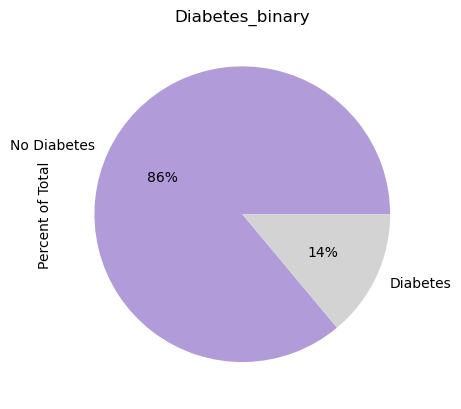

In [5]:
# Plot the percentage of people with diabetes as a percentage of the total number of people
# 0 = No Diabetes, 1 = Diabetes
labels = ['No Diabetes', 'Diabetes']
diabetes_binary_2015['Diabetes_binary'].value_counts().plot(kind='pie', labels= labels, autopct='%1.0f%%', colors=colors)
plt.title('Diabetes_binary')
plt.ylabel('Percent of Total') 
plt.show()


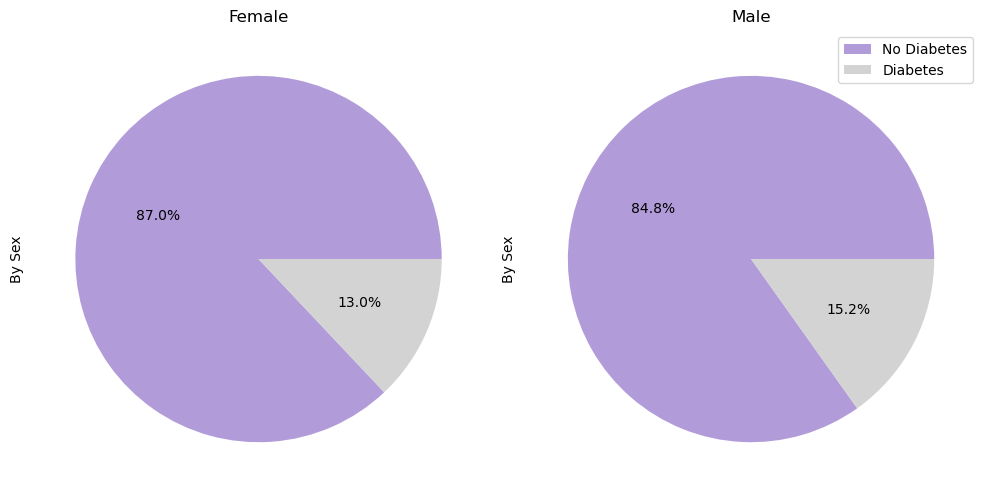

In [6]:
# Plot the percentage of people with diabetes as a percentage of sex
# 0 = Female, 1 = Male

grouped_sex = df.groupby('Sex')['Diabetes_binary'].value_counts(normalize=True).mul(100).unstack()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, (sex, data) in enumerate(grouped_sex.iterrows()):
    ax = axes[i]
    data.plot(kind='pie', ax=ax, autopct='%1.1f%%', labels=None, colors=colors)
    ax.set_ylabel('By Sex')
    ax.set_title(f'{"Male" if sex == 1 else "Female"}')  


# Adding labels
axes[1].legend(labels=['No Diabetes', 'Diabetes'], loc='upper right')

plt.tight_layout()
plt.show()

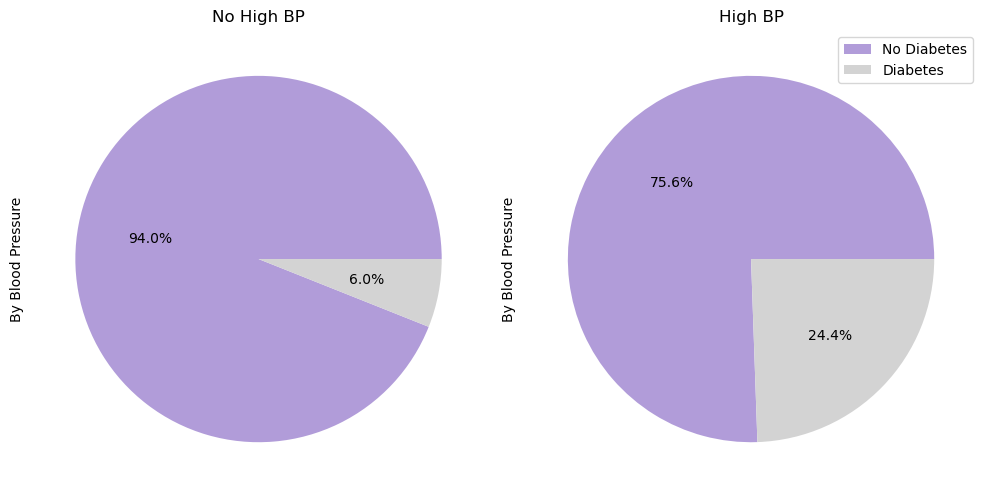

In [7]:
# Plot the percentage of people with diabetes as a percentage of the people with high blood pressure
# 0 = No High BP, 1 = High BP

grouped_bp = df.groupby('HighBP')['Diabetes_binary'].value_counts(normalize=True).mul(100).unstack()


fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, (bp, data) in enumerate(grouped_bp.iterrows()):
    ax = axes[i]
    data.plot(kind='pie', ax=ax, autopct='%1.1f%%', labels=None, colors=colors)
    ax.set_ylabel('By Blood Pressure')
    ax.set_title(f'{"High BP" if bp == 1 else "No High BP"}')  # Display 0 = Female and 1 = Male


# Adding labels
axes[1].legend(labels=['No Diabetes', 'Diabetes'], loc='upper right')

plt.tight_layout()
plt.show()

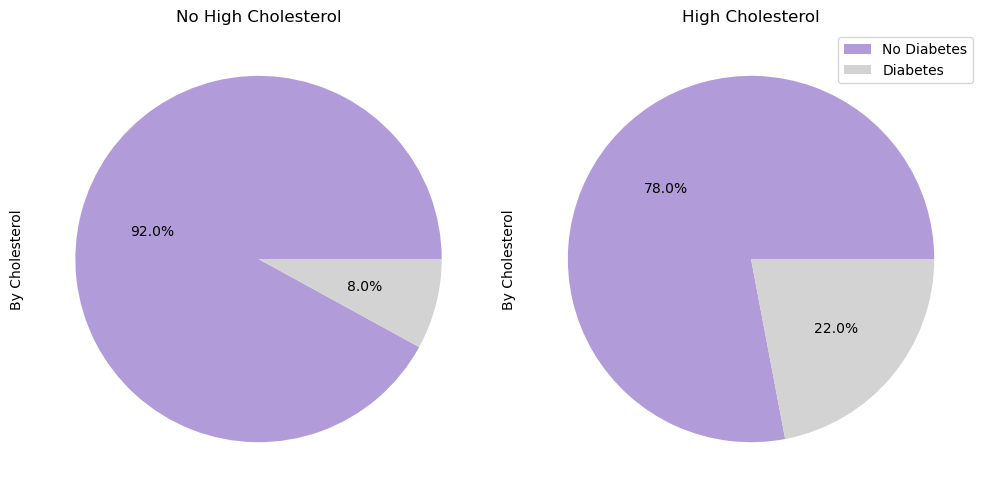

In [10]:
# Plot the percentage of people with diabetes as a percentage of the total number of people
# 0 = No High Cholesterol, 1 = High Cholesterol

grouped_hc = df.groupby('HighChol')['Diabetes_binary'].value_counts(normalize=True).mul(100).unstack()


fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, (hc, data) in enumerate(grouped_hc.iterrows()):
    ax = axes[i]
    data.plot(kind='pie', ax=ax, autopct='%1.1f%%', labels=None, colors=colors)
    ax.set_ylabel('By Cholesterol')
    ax.set_title(f'{"High Cholesterol" if hc == 1 else "No High Cholesterol"}')  

axes[1].legend(labels=['No Diabetes', 'Diabetes'], loc='upper right')

plt.tight_layout()
plt.show()

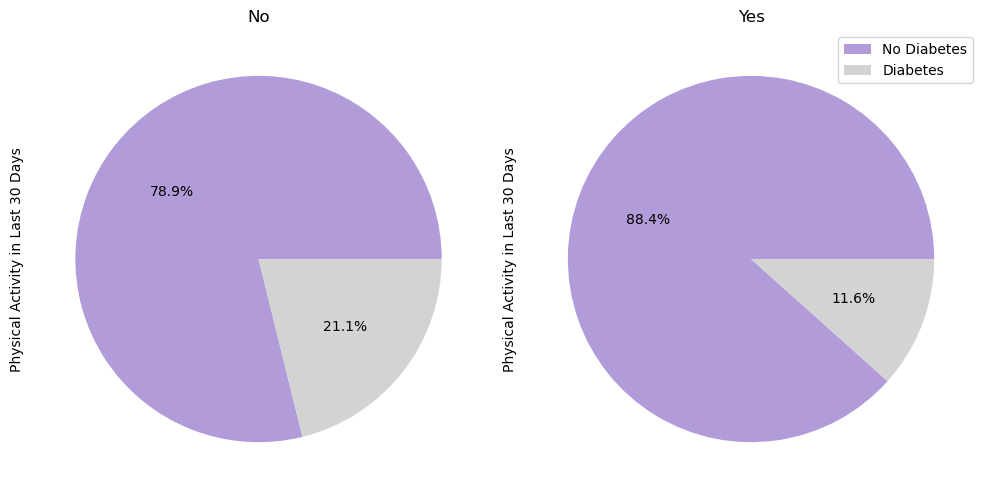

In [13]:
# Plot the percentage of people with diabetes and the percentage of people who have engaged in physical activity in the last 30 days
# 0 = No, 1 = Yes

grouped_pa = df.groupby('PhysActivity')['Diabetes_binary'].value_counts(normalize=True).mul(100).unstack()


fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, (pa, data) in enumerate(grouped_pa.iterrows()):
    ax = axes[i]
    data.plot(kind='pie', ax=ax, autopct='%1.1f%%', labels=None, colors=colors)
    ax.set_ylabel('Physical Activity in Last 30 Days')
    ax.set_title(f'{"Yes" if pa == 1 else "No"}')  

axes[1].legend(labels=['No Diabetes', 'Diabetes'], loc='upper right')

plt.tight_layout()
plt.show()

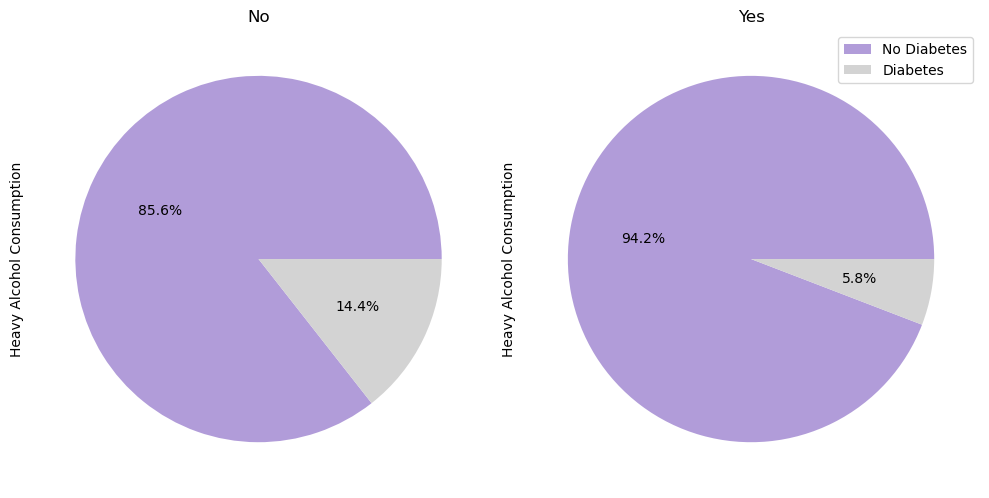

In [16]:
# Plot the percentage of people with diabetes and the percentage of people who have heavy alcohol consumption 
# 0 = No, 1 = Yes

grouped_alcohol = df.groupby('HvyAlcoholConsump')['Diabetes_binary'].value_counts(normalize=True).mul(100).unstack()


fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, (alcohol, data) in enumerate(grouped_alcohol.iterrows()):
    ax = axes[i]
    data.plot(kind='pie', ax=ax, autopct='%1.1f%%', labels=None, colors=colors)
    ax.set_ylabel('Heavy Alcohol Consumption')
    ax.set_title(f'{"Yes" if alcohol == 1 else "No"}')  

axes[1].legend(labels=['No Diabetes', 'Diabetes'], loc='upper right')

plt.tight_layout()
plt.show()

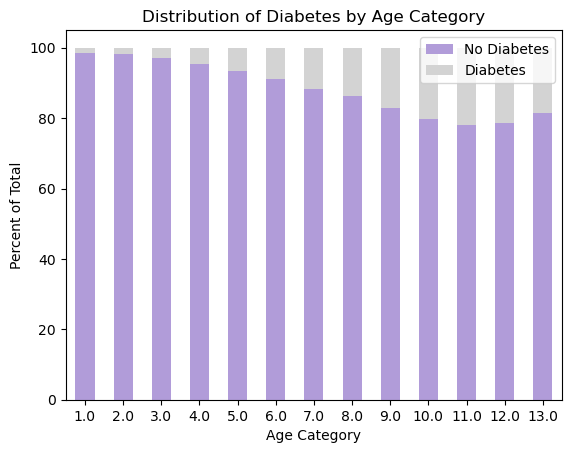

In [19]:
# Grouping by 'Age' and 'Diabetes_binary' to count occurrences
# 1 = 18-24
# 2 = 25-29
# 3 = 30-34
# 4 = 35-39
# 5 = 40-44
# 6 = 45-49
# 7 = 50-54
# 8 = 55-59
# 9 = 60-64
# 10 = 65-69
# 11 = 70-74
# 12 = 75-79
# 13 = 80 or older

grouped_age = df.groupby(['Age', 'Diabetes_binary']).size().unstack(fill_value=0)

# Calculating percentages
total_per_category = grouped_age.sum(axis=1)  
grouped_percent = grouped_age.div(total_per_category, axis=0) * 100  

# Plotting the bar graph
grouped_percent.plot(kind='bar', stacked=True, color=colors) 
plt.xlabel('Age Category')
plt.ylabel('Percent of Total')
plt.title('Distribution of Diabetes by Age Category')
plt.legend(['No Diabetes', 'Diabetes'], loc='upper right')
plt.xticks(rotation=0) 
plt.show()

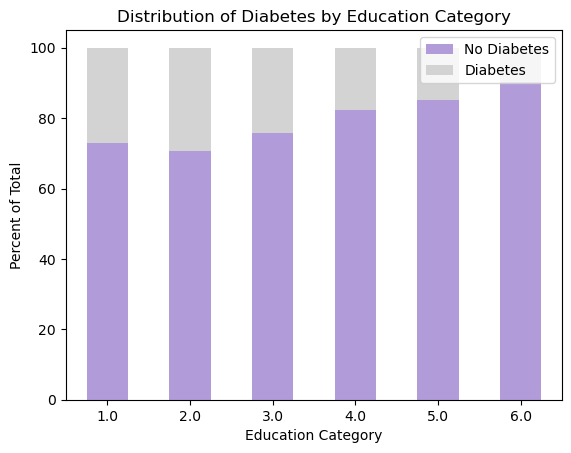

In [26]:
# Grouping by 'Education' and 'Diabetes_binary' to count occurrences
# 1 Never attended school or only kindergarten
# 2 Grades 1 through 8 (Elementary) 
# 3 Grades 9 through 11 (Some high school) 
# 4 Grade 12 or GED (High school graduate)
# 5 College 1 year to 3 years (Some college or technical school)
# 6 College 4 years or more (College graduate)

grouped_educ = df.groupby(['Education', 'Diabetes_binary']).size().unstack(fill_value=0)

# Calculating percentages
total_per_category = grouped_educ.sum(axis=1)  
grouped_percent = grouped_educ.div(total_per_category, axis=0) * 100  

# Plotting the bar graph
grouped_percent.plot(kind='bar', stacked=True, color=colors) 
plt.xlabel('Education Category')
plt.ylabel('Percent of Total')
plt.title('Distribution of Diabetes by Education Category')
plt.legend(['No Diabetes', 'Diabetes'], loc='upper right')
plt.xticks(rotation=0) 
plt.show()

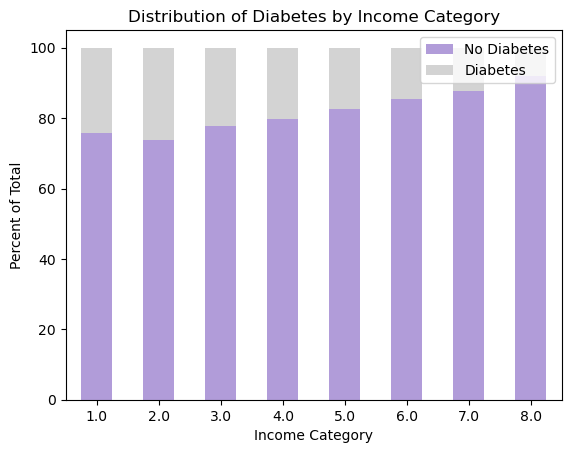

In [46]:
# Grouping by 'Income' and 'Diabetes_binary' to count occurrences
# 1 Less than $10,000
# 2 Less than $15,000 ($10,000 to less than $15,000)
# 3 Less than $20,000 ($15,000 to less than $20,000)
# 4 Less than $25,000 ($20,000 to less than $25,000)
# 5 Less than $35,000 ($25,000 to less than $35,000)
# 6 Less than $50,000 ($35,000 to less than $50,000)
# 7 Less than $75,000 ($50,000 to less than $75,000)
# 8 $75,000 or more

grouped_income = df.groupby(['Income', 'Diabetes_binary']).size().unstack(fill_value=0)

# Calculating percentages
total_per_category = grouped_income.sum(axis=1)  
grouped_percent = grouped_income.div(total_per_category, axis=0) * 100  

# Plotting the bar graph
grouped_percent.plot(kind='bar', stacked=True, color=colors) 
plt.xlabel('Income Category')
plt.ylabel('Percent of Total')
plt.title('Distribution of Diabetes by Income Category')
plt.legend(['No Diabetes', 'Diabetes'], loc='upper right')
plt.xticks(rotation=0) 
plt.show()